Give me 10 companies who say they do NLP and AI and I'll show you 10 companies that have teams of Ph.Ds writing regular expressions. That's not to say that AI is bad, it just goes to show that regular expressions (or regex) are amazingly useful. Despite their ubiquity, age (since the 60's) and power, their aren't many resoures about using regular expressions for natural language processing.

This post seeks to remedy that, we'll be building on the assumption that you know basic regex syntax and have probably used them in day to day or even production. Instead of reiterating the syntax, we'll talk about the different ways we can use regex to serve our NLP pipelines, a bit about their place in the theory of formal language and some other fun stuff. 




# Some Theory
Regex aren't a feature of your programming language or text editor, they are a way to describe a theoretical thing called a [regular language](https://en.wikipedia.org/wiki/Regular_language). This theoretical thing lives in the world of [formal language theory](https://en.wikipedia.org/wiki/Formal_language) and in that world regular languages live at the bottom of the [Chomsky Hierarchy](https://en.wikipedia.org/wiki/Chomsky_hierarchy). 

The definitions for all of those things are "dense" to say the least, and as practitioners they don't help us much. I bring them up at all because we can use these ideas to quickly charachterize what we can expect from a regular language and what we can't. 

The Chomsky Hierarchy is a heirarchy of types of languages, each step in hierarchy can express something that the other can't. Regular languages are at the bottom, and any single regex is a particular language in the set of regular languages. 
## Generative Adverserial Regex
You probably used regex to find things, so this sounds a bit abstract. But, you can also use a regex to generate strings. When you write a a regex your basically saying  "Here is the definition of a language and it's grammer" and we can use that definition to see if a string matches it, but also to follow the rules and generate new strings

For example, here is the regex for American Telephone numbers
```regex
\([2-9]\d{2}\)[2-9]\d{2}-\d{4}
```
And here are some strings it generates when we plug it into a "Text from regex" module like [here](https://www.browserling.com/tools/text-from-regex)
>
   - (803)977-1255
   - (993)365-4247
   - (744)639-9566
   - (414)269-6307

We can make fake gmail addresses with a regex like
```python
r"[a-z]{3,10}\.[a-z]{3,10}@gmail\.com"
```
Which would produce things like 
    - xbwbboszs.gmdo@gmail.com
    - tdmlyg.uiah@gmail.com
    - wpzahxovlw.prxlbje@gmail.com
    - fohjqncgq.owzltlg@gmail.com
    - ejyiq.gasnat@gmail.com

Again, you've probably used regexs like these to match for patterns, but you can just as easily use them to generate text. That's what we mean when we say that regular expressions are an instance of a regular language, each regex defines a language and you can use it to generate all of the strings in that language (which might be infinite). 

## What comes after Regular Languages ?

A [legendary answer to a stack overflow question](https://stackoverflow.com/questions/1732348/regex-match-open-tags-except-xhtml-self-contained-tags) famously said: 
>You can't parse [X]HTML with regex. Because HTML can't be parsed by regex.... Every time you attempt to parse HTML with regular expressions, the unholy child weeps the blood of virgins, and Russian hackers pwn your webapp. Parsing HTML with regex summons tainted souls into the realm of the living. HTML and regex go together like love, marriage, and ritual infanticide. 

And while that is 100% correct, the answer does not make it clear why that is the case. The why here is actually pretty important, because even though you theoretically can't use regex to do many things you'd like to, in practice you actually can. So let's dive into what you can't do in theory and talk about what you can do in practice. 

The next stage of languages is called context free. What sets them apart from regular languages, speaking very very informally, is the ability to express arbitrarily nested things. Going back to the HTML quote above, a regular language can't express any arbitrarily deep list like
- One
 - Two
   - Three
    - ....
      - Seven billion million levels of nesting

But, even though regular languages can't do this, and you risk the unholy child weeping the blood of virgins if you try, you can still probably pull it off. The reason being, that in the wild, most things that will interest you are going to be finite, say nested lists with a maximal depth of 6. Their is a little bit more to bending this rule than just that assumption and we'll get to it later. But for now, don't feel like regex are a bad choice just because Stack Overlfow said so

## Being Sensitive to Context
Unless you've been hiding under a rock or don't care about NLP, you've probably heard how deep learning makes use of context to be awesome and outperform everything that ever came before. Let's try and stump one of such awesome deep learning based system. We're not just doing this for fun, but also to illustrate another kind of language and a real limitation of regular expressions. 

We're going to take the sentence 
> I have red things such as balloons with green strings and cars that have black wheels

Think about it. 
> What color are my cars ? 

Well, if we ask a deep learning based reading comprehension system, such as the one put outby the folks at [AllenNLP](https://demo.allennlp.org/reading-comprehension/OTgzMzA1), the answer you'll get is **black** which is also wrong. 
The thing with this sentence that's special, and hard, is that the word *red* sets up a "context" over a few items that come after it. *Red* modifies both the *baloons* and the *cars*. I think that it's quite amazing that the the AllenNLP system understood my question, and at least returned a color instead of random giberish, this example isn't to knock on them. These constructions though, appear a lot and regular expresions can't handle them either. 

One day, you'll be debugging some evil regex trying to figure out why you can't capture the red with both both the baloons and the cars, and you'll think about this blog post and remember that you just plain can't.  Luckily, I'm an optimist, so you actually can. We'll find out how later


# What are Regex Good For
Regex are amazing for finding things, which is probably what you used them for so far. "Finding things" is acutally three related things. 
1. **Search** Taking a big corpus of documents and narrowing it down to the documents that contain what I'm looking for. 
2. **Extraction** Matching a pattern in a given text and extracting it. For example : Give me all emails and phone numbers in some document
3. **Candidate Surfacing** This is a combination of the two abovem where we want to search for some pattern in a large corpus, then narrow it down of refine the results. 

## Search
To illustrate this point, we wanted to find out what diseases are most commonly talked about on Reddit. As a first order aproximation, we searched all of the reddit comments for any comment that had a word with more than 6 letters ending in *osis*. And came back with 
 - metamorphosis 
 - tuberculosis 
 - endometriosis 
 - osteoporosis 
 - apotheosis 
 - misdiagnosis 
 - toxoplasmosis 
 - hyperhidrosis 
 - atherosclerosis 
 - ketoacidosis
 - matthewmatosis
 
 And many more. Notably, not all of these words are diseases, *metamorphosis* is a change *[apotheosis](https://en.wikipedia.org/wiki/Apotheosis)* is *is the glorification of a subject to divine level* and [matthewmatosis](https://twitter.com/matthewmatosis?lang=en) is a minor Youtube Celebrity in the gaming community. That might not seem impressive at first, but using regex we were able to run over a years worth of Reddit comments and discover words we didn't know about and that were super relevant such as ketoacidosis and endometriosis which presumably you only know about if you or a loved one are afflicted.

## Extraction
NLP is a broad subject, but many of the industrial use cases fall into informatione extraction and retreival. The beuty of regex here is that they let us use our domain knoweledge to search for relevant patterns, even if we don't know exactly what we're looking for. The example above, with the osis is a good example of that. 

Reddit is a very broad and general dataset, often times when we do NLP work our domain narrower and in some ways more unique. For example, in Oil and Gass exploration, every drilling rig keeps logs of what happened on the rig, written by humans. Their are tens of years of this data accrued and it has become worthwile to analyze it. For example we might want to find out what the average flow was when applying particular pressures in different regions. With a bit of domain knoweldge we could search for 
```
[\d.]+bpm .+? [\d,.]+psi
```
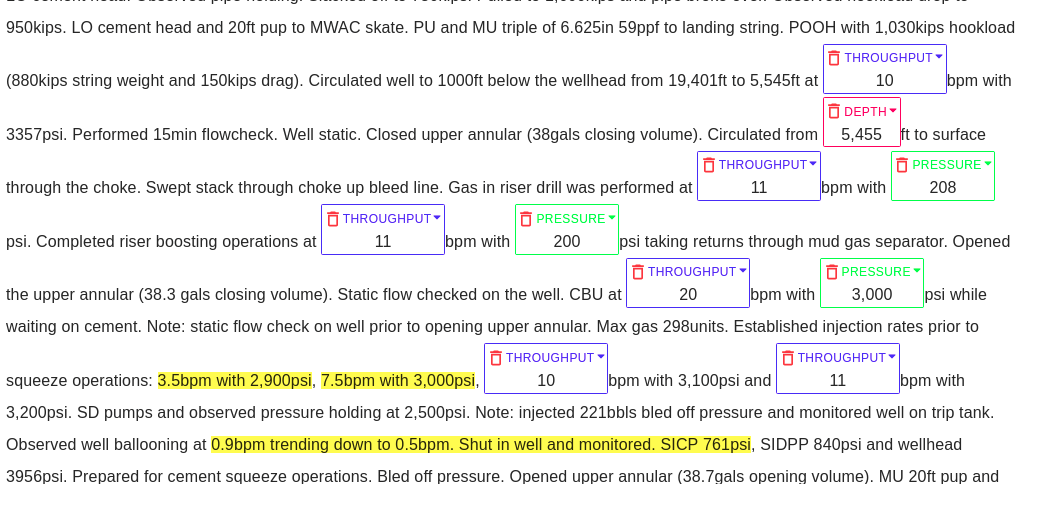

And use our annotation system ([LightTag](lighttag.io)) to refine the matches 

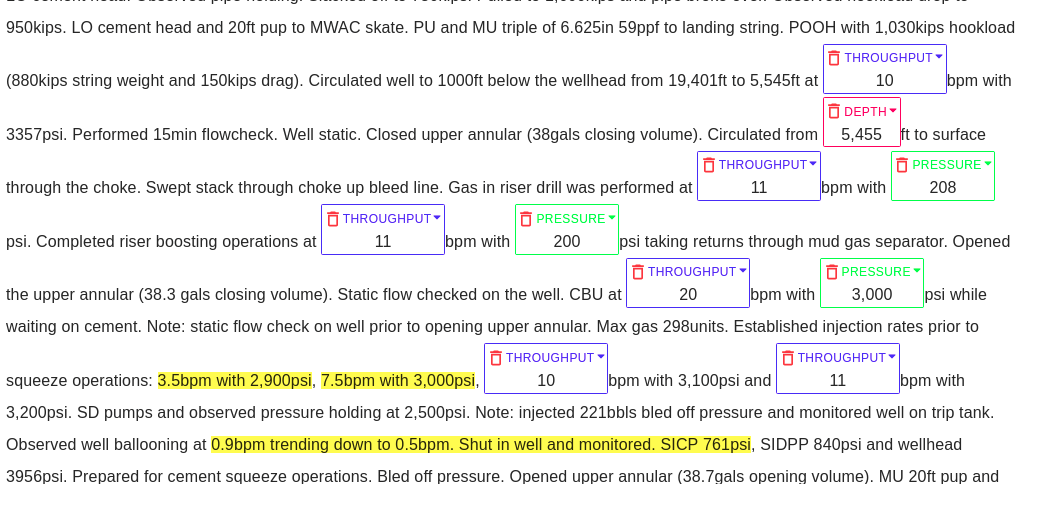

When we start an NLP project, we usually have some knoweldge of the domain that would be great to leverage. Some of that knoweldge might be logical rules, but some of it will be patterns we expect our data to follow. I'll give a few examples

## Finding People with Regex
Often we're tasked with finding people and places (or company names) in some text. If we're working in English we can make a few observations and translate them to regex
1. People, Places and Companies are proper nouns
2. Proper nouns are capitalized
3. People tend to do things with verbs. 
4. Verbs tend to be inflected based on tense, so many of them will end with d or ed in the passed, or ing in the future. 

Let's see how we can translate that into a useful regex. I'll find names of people in the bible by applying that logic.
We'll make a regex that
 - Searches for a word starting with a capital letter \s[A-Z][a-z]+\s
     - \s means whitespace
     - [A-Z] means capital letter
     - [a-z]+ means any sequence of lower case letters
     - \s means whitespace
 - That is followed by another word that ends with d or ing [a-z]+((d)|(ing))\s
     - [a-z]+ means any sequence of lower case letters (we don't want proper nouns
     - ((d)|(ing)) means either *d* or *ing*
     - \s means anywhitespace - meaning we want the word to have ended with d or ing
     
 Let's see what we get back
  - David
  - Saul
  - Samuel
  - **Then**
  - **Philistines**
  - Jonathan
  - **Israel**
  - Eli
  - **And**
  - Hophni
  - Achish
  - Jesse
  - **Philistine**
  - **God**
  - Gad
  - Jabesh
  - Nabal
  - Ahimelech
  - **The**
  - Hannah
  - Michmash
  - **An**
  - **Ashdod**
  - **Therefore**
  - **Mizpeh**
  - **Ammonite**
  - **Amalek**
  - **Kish**
  - Peninnah
I highlighted the items that were wrong. 


Using the same regex we can get a list of people from tweets as well
Donald Trump 
  - Ted Cruz 
  - Hillary Clinton 
  - Crooked Hillary 
  - Marco Rubio 
  - Lindsey Graham 
  - Bill Clinton 
  - President Obama 
  - United States 
  - Bernie Sanders 
  - Elizabeth Warren 
  - Wall Street 
  - Mike Pence 
  - Jeb Bush 
  - Puerto Rico 
  - Plaza Casino 
  - Supreme Court 
  - Rick Perry 
  - West Virginia 
  - Trump Institute 
  - New Jersey 
  - What Bill 
In this example, I modified the regex slightly. I wanted to get Full names and so I I specified that the *Proper-Noun then space* pattern should appear twice. In regex that looks like this: 
```
([A-Z][a-z]+\s){2})
```
I could also have the regex get either single or double proper nouns, (e.g. Clinton or Hillary Clinton) by modifying the regex to
```
([A-Z][a-z]+\s){1,2})
```
Which would give me  :
  - Trump 
  - Hillary 
  - Donald Trump 
  - Ted Cruz 
  - Hillary Clinton 
  - Clinton 
  - Crooked Hillary 
  - Cruz 
  - Americans 
  - Democrats 
  - America 
  - Rubio 
  - Obama 
  - Republicans 
  - Looking 
  - Marco Rubio 
  - Romney 
  - Lindsey Graham 
  - Russia 
  - Iowa 
  - Pence 
  - Don 


Searching for Named Entities is a little contrived. Libraries like CoreNLP and Spacy have great named entity recognition features, which will probably do a much better job than you at finding named entities and associating their type. 

But the principle still holds. Namely, that where we have some domain expertise that can be expressed in string patterns, we want to use it. We'll show two examples here, **finding common diseases** on Reddit and extracting data from Oil and Gas exploration

## Finding Diseases in Reddit
Reddit is a treaure trove of data. Let's say we want to find out what ailments are most talked about in Reddit. Being natural language people, we don't know the names of all of the diseases. However, we do know that long words ending in **ania** like *hypothermia* and long words ending in **osis** like *hemochromatosis* are diseases. 
The regex for that is 
```
([a-z]{10,}((ania)|osis)))
```
The thing is, this by itels isn't a great filter. We might hit things like *Wrestle**mania***  and *metamorph**osis***. To make our regex a little more precise, we can prefix it with possesive words such as  *have*,*had*,*has* and *with*. We do this because we are interested in people speaking about diseases that someone has, e.g. possesed and we leverage our knoweledge of English and how it is used to focus on our query. People have ***a** metamorphosis* and *go **to** Wrestle**mania*** but they *have Schizophrenia* or know someone *dealing with endometriosis* .
The full regex is
```
(((have)|(has)|(had)|(with)) ([a-z]{5,}((ania)|osis)))
```
We get back
 - scoliosis
 - endometriosis
 - psychosis
 - osteoporosis
 - tuberculosis
 - diagnosis
 - trichotillomania
 - cirrhosis
 - hyperhidrosis
 - toxoplasmosis
 - hypomania
 - hyperhydrosis
 - halitosis
 - dermatillomania
 - keratosis
 - hemochromatosis
 - pyromania
 - adenomyosis
 - kleptomania
 - ketoacidosis
 - metamorphosis
 - megalomania
 - atherosclerosis
 - mononucleosis
 - neurofibromatosis
 - metroidvania
 - sarcoidosis
 - lithuania
 - castlevania
 - diverticulosis


ed, shut down pumps due to loss of cement feed. Observed valve actuator on rig delivery system failed. Manually functioned valve. Continued pumping 

## Finding Drilling Depths in Oil and Gas

You might not know, but the Oil and Gass industry sits on top of one of the most valuable resources in Text mining and NLP. Namely, that for decades, every drilling rig has had someone keep a meticulous log of what happened on the rig that day. How deep did they drill, what kind of bit was used, what happened etc. 

They've been doing this since before anyone thought about AI, so it's a huge pile of free text, and a lot of it is publically availble.The thing is, you really need to be a drilling person to understand it, here's an example
> MAIN DERRICK - Circulated at 5bpm with 1,750psi while preparing to pump spacer. Lined up to cement unit pumped 10bbls 14.7ppg mudpush-II spacer with surfactant. Note: observed 5,000psi break over after pumping initial spacer. Pumped additional 40bbls 14.7ppg mudpush-II spacer with surfactant. Pumped 30bbls 15.05ppg mudpush-II spacer. 

And here's another one, just for fun
> Trip in the hole with the Upper Zone TCP Gun assembly and Packer Plug on 5 7/8"" drill pipe from 3,649' to 9,040'. Record pick up wt - 368 k , slack off wt - 349 k, with 1' of pipe stretch. Drifting same to 4.375"".  Monitoring the well on the trip tank for proper displacement. Continue GIH with perforation assembly. Pick up Perforating head and make up to Drill Pipe. Sting in Isolation packer with 20K down at 9040'.Shear off packer plug was seen with 10k down on drill pipe.

Here are a few things we know about this text: 
1. Any number ending with psi is a measurement of pressure
2. Any number ending with [ppg](https://www.glossary.oilfield.slb.com/Terms/p/ppg.aspx) is fluid density
3. [bbl](http://www.businessdictionary.com/definition/barrel-bbl.html) = barrel and bbls is the plural

A common pattern is that they'll say "We drilled from depth A to depth B" such as
> POOH from 1,947' to 1,944' *(POOH= Pull out of the hole)*
> TOOH from 5082' to 4940' 
> Continued TIH w/ Schlumberger Overshot assembly on 5"" R-3 22 lbs/ft drill pipe from 5,298' to 5,678'.

Intersting events happen when they drill and instead of saying "from A to B" say "From A ... something else". The thing is, this is only intersting on the way down. Using this knoweledge we can craft a regex that searches for mentions of "from a certain depth" that were not preceded by POOH and not followed by to

The first part is easy, we write
```
from [\d,']+ [^t]
``` 
To get all depth measures not followed by to. But then we hit a lot of psi, so we can expand this to
```
from [\d,'"]+ [^t][A-Za-z]+
```



In [127]:
diseases.head()

,subreddit,word,c
0,AskReddit,endometriosis,7931
1,TwoXChromosomes,endometriosis,5808
2,AskReddit,tuberculosis,5019
3,keto,ketoacidosis,4694
4,Endo,endometriosis,3830


In [126]:
diseases = pd.read_csv('./disease_by_subreddit.csv')
print('\n - '.join(diseases.word.values[:30]))

endometriosis
 - endometriosis
 - tuberculosis
 - ketoacidosis
 - endometriosis
 - osteoporosis
 - misdiagnosis
 - endometriosis
 - metamorphosis
 - endometriosis
 - endometriosis
 - metamorphosis
 - metamorphosis
 - hyperhidrosis
 - endometriosis
 - toxoplasmosis
 - toxoplasmosis
 - ketoacidosis
 - endometriosis
 - hyperhidrosis
 - pneumonoultramicroscopicsilicovolcanoconiosis
 - ketoacidosis
 - atherosclerosis
 - endometriosis
 - thrombosis
 - tuberculosis
 - tuberculosis
 - endometriosis
 - osteoporosis
 - osteoporosis


In [83]:
import pandas as pd
import re
bible = pd.read_csv('../../sample_data/tweets.csv',)
bible.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [135]:
bible[~bible.person.isnull()].person.unique

<bound method Series.unique of 1            Donald Trump 
9               Has Trump 
14                  Trump 
28                     We 
40                    Get 
44                  Trump 
65           Donald Trump 
73                  Trump 
74                Clinton 
77                     He 
86                  Trump 
94                Clinton 
101          Donald Trump 
103          Donald Trump 
119                   Law 
129                   Why 
153                   You 
155          Donald Trump 
180          Donald Trump 
198            Republican 
217                 Trump 
219               Clinton 
222                    We 
231               Clinton 
241           Puerto Rico 
262                Romney 
264               Hillary 
271             Democrats 
281     African Americans 
286                    We 
               ...        
6175                  Don 
6183               Canada 
6193                   He 
6213                Rubio 
6224              Buckle

In [114]:
reg = re.compile('\s(?P<name>([A-Z][a-z]+\s){1,2})[a-z]+((d))\s')
def findPerson(row):
    match = reg.search(row.text)
    if match:
        return match.groupdict()['name']
emoReg = re.compile('(?P<name>(\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff]))')
def findEmoji(row):
    match = emoReg.search(row.text)
    if match:

        return match.groupdict()['name']

In [148]:
def presidentTrumpSentiment(tweet):
    emojiReg = re.compile('(?P<name>(\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff]))')
    handleReg = re.compile('@(\w){1,15}')
    hasEmoji = emojiReg.search(tweet)
    if not hasEmoji:
        return None
    hasReg = handleReg.search(tweet)
    print(hasEmoji)
    if hasReg:
        return 'Negative'
    else:
        return 'Positive'

In [149]:
bible['sentiment'] = bible.text.apply(presidentTrumpSentiment)

<_sre.SRE_Match object; span=(94, 95), match='…'>
<_sre.SRE_Match object; span=(115, 116), match='…'>
<_sre.SRE_Match object; span=(103, 104), match='…'>
<_sre.SRE_Match object; span=(96, 97), match='’'>
<_sre.SRE_Match object; span=(0, 1), match='“'>
<_sre.SRE_Match object; span=(69, 70), match='→'>
<_sre.SRE_Match object; span=(23, 24), match='’'>
<_sre.SRE_Match object; span=(6, 7), match='’'>
<_sre.SRE_Match object; span=(108, 109), match='—'>
<_sre.SRE_Match object; span=(35, 36), match='’'>
<_sre.SRE_Match object; span=(122, 123), match='—'>
<_sre.SRE_Match object; span=(6, 7), match='’'>
<_sre.SRE_Match object; span=(2, 3), match='’'>
<_sre.SRE_Match object; span=(96, 97), match='”'>
<_sre.SRE_Match object; span=(78, 79), match='→'>
<_sre.SRE_Match object; span=(93, 94), match='…'>
<_sre.SRE_Match object; span=(0, 1), match='“'>
<_sre.SRE_Match object; span=(55, 56), match='—'>
<_sre.SRE_Match object; span=(110, 111), match='…'>
<_sre.SRE_Match object; span=(107, 108), match='…'

In [144]:
bible.handle.unique()
trump = bible[bible.handle=='realDonaldTrump']

In [150]:
print('\n\n > '.join(trump[trump.sentiment=='Positive'].text.values[:15]))

Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc

 > On National #VoterRegistrationDay, make sure you're registered to vote so we can #MakeAmericaGreatAgain… https://t.co/0wib6UEZON

 > In the last 24 hrs. we have raised over $13M from online donations and National Call Day, and we’re still going! Thank you America! #MAGA

 > Such a great honor. Final debate polls are in - and the MOVEMENT wins!
#AmericaFirst #MAGA #ImWithYou… https://t.co/DV1BKMwHEM

 > Thank you! Four new #DebateNight polls with the MOVEMENT winning. Together, we will MAKE AMERICA SAFE &amp; GREAT AGAIN… https://t.co/39FCnUf8Pb

 > Thank you! CNBC #DebateNight poll with over 400,000 votes. 
Trump 61%
Clinton 39%
#AmericaFirst #ImWithYou… https://t.co/MJ3NwA98op

 > Hillary Clinton failed all over the world. 
❌LIBYA
❌SYRIA
❌IRAN
❌IRAQ
❌ASIA PIVOT
❌RUSSIAN RESET
❌BENGHAZI… https://t.co/OoakXs2rij

 > Hillary's policies have made America less safe, t

In [119]:
bible.handle.unique()

array(['HillaryClinton', 'realDonaldTrump'], dtype=object)

In [123]:
bible['emoji'] = bible.apply(findEmoji,1)
bible[(~ bible.emoji.isnull())& ~(bible.handle=='realDonaldTrump')].text.to_frame()

,text
10,The election is just weeks away. Check if you'...
17,“She gained about 55 pounds in...9 months. She...
18,It's #NationalVoterRegistrationDay. Celebrate ...
19,"""I love this country.\nI’m proud of this count..."
20,We don’t want to turn against each other.\nWe ...
21,"""What we hear from my opponent is dangerously ..."
22,One candidate made it clear he wasn’t prepared...
23,"""What kind of a person would want to root for ..."
24,"""I don’t think that any family should have to ..."
25,"""I’m really glad my dad never had a contract w..."


In [154]:
bib = pd.read_json('../../sample_data/bible.json')

In [195]:
reg = re.compile('[^.] (?P<entity>[A-Z][a-z]+?) (?P<verb>[a-z]+ed) ')
def extract(text):
    match = reg.search(text)
    if match:
        return (match.groupdict())
    return {}
R = map(extract,bib.content.values.tolist())
R = filter(lambda x:x,R)
R = pd.DataFrame(list(R))
R.groupby(('entity',)).verb.value_counts().sort_values(ascending=False)

/home/tal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  # Remove the CWD from sys.path while we load stuff.


entity       verb      
Philistines  gathered      6
Samuel       called        3
David        enquired      3
Jonathan     cried         2
David        behaved       2
Samuel       turned        2
Saul         returned      2
Samuel       judged        2
David        recovered     2
             played        2
             saved         2
             answered      2
Jonathan     answered      2
Samuel       ministered    2
Israel       rejoiced      1
             fled          1
Hannah       answered      1
Israel       returned      1
             shouted       1
             gathered      1
Eli          perceived     1
             marked        1
             called        1
             blessed       1
             answered      1
Jesse        called        1
Israel       lamented      1
God          delivered     1
Saul         tarried       1
Ekronites    cried         1
                          ..
Saul         gathered      1
             hearkened     1
             lifted